In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [39]:
cardio_data = pd.read_excel("cardio_train.xlsx")

# Preliminary Analysis

In [40]:
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Count'>

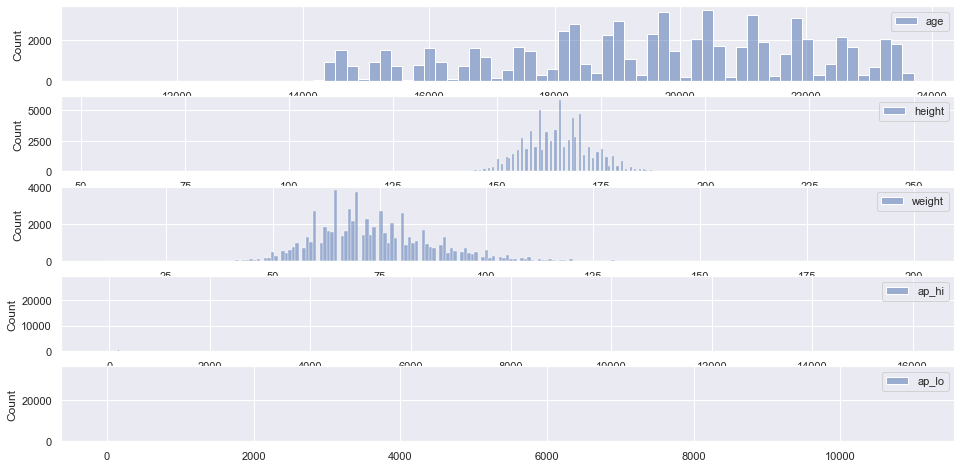

In [43]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.histplot(data = cardio_data[["age"]], ax = axes[0])
sb.histplot(data = cardio_data[["height"]], ax = axes[1])
sb.histplot(data = cardio_data[["weight"]], ax = axes[2])
sb.histplot(data = cardio_data[["ap_hi"]], ax = axes[3])
sb.histplot(data = cardio_data[["ap_lo"]], ax = axes[4])

<AxesSubplot:>

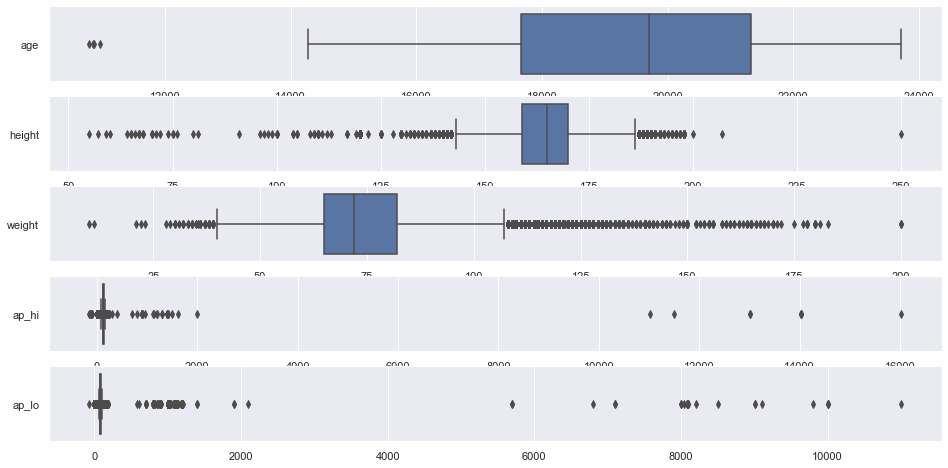

In [44]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.boxplot(data = cardio_data[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = cardio_data[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = cardio_data[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = cardio_data[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = cardio_data[["ap_lo"]], ax = axes[4], orient = "h")

# Cleaning up the data

In [45]:
cardio_data.drop(cardio_data[cardio_data['ap_hi'] > 200].index, inplace = True)
cardio_data.drop(cardio_data[cardio_data['ap_hi'] < 50].index, inplace = True)

cardio_data.drop(cardio_data[cardio_data['ap_lo'] > 200].index, inplace = True)
cardio_data.drop(cardio_data[cardio_data['ap_lo'] < 50].index, inplace = True)

cardio_data.drop(cardio_data[cardio_data['weight'] < 40].index, inplace = True)

cardio_data.drop(cardio_data[cardio_data['height'] < 120].index, inplace = True)

In [64]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000,68605.000000
mean,49968.482924,19463.764682,1.348808,164.423555,74.135349,126.556854,81.372101,1.364653,1.225960,0.088026,0.053640,0.803309,0.494760
std,28849.821462,2468.186212,0.476597,7.910216,14.259538,16.562348,9.594890,0.678970,0.571962,0.283334,0.225308,0.397500,0.499976
min,0.000000,10798.000000,1.000000,120.000000,40.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24994.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50010.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74869.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,200.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

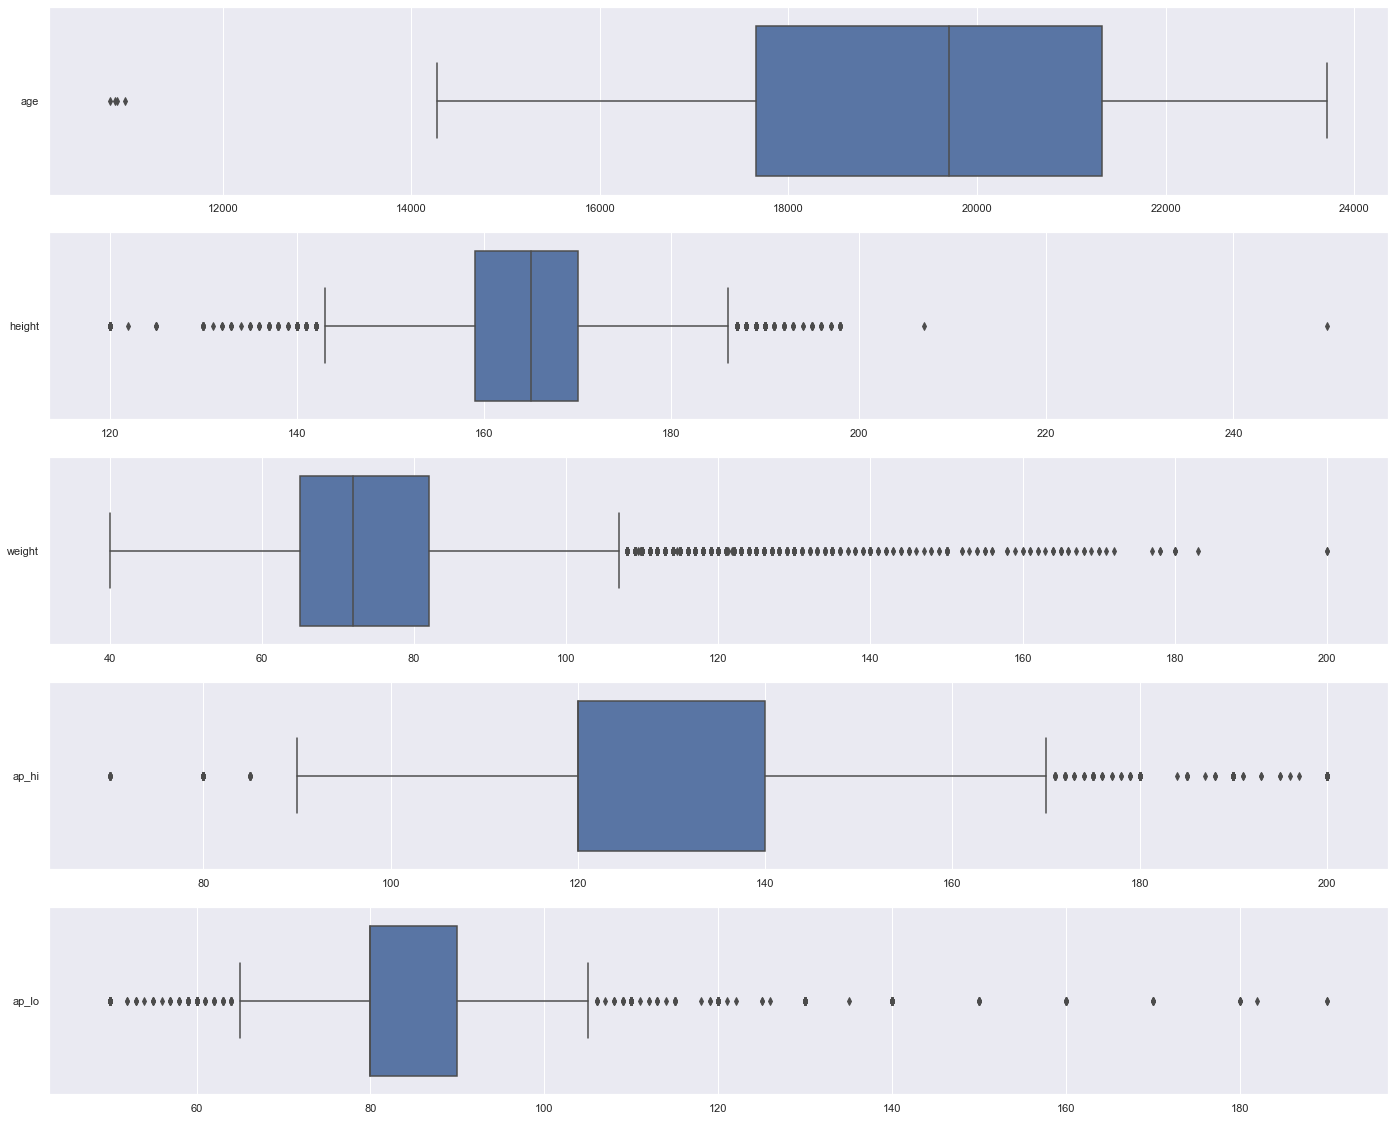

In [47]:
f, axes = plt.subplots(5, 1, figsize=(24, 20))

sb.boxplot(data = cardio_data[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = cardio_data[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = cardio_data[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = cardio_data[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = cardio_data[["ap_lo"]], ax = axes[4], orient = "h")

cholesterol    int64
dtype: object

<AxesSubplot:ylabel='Count'>

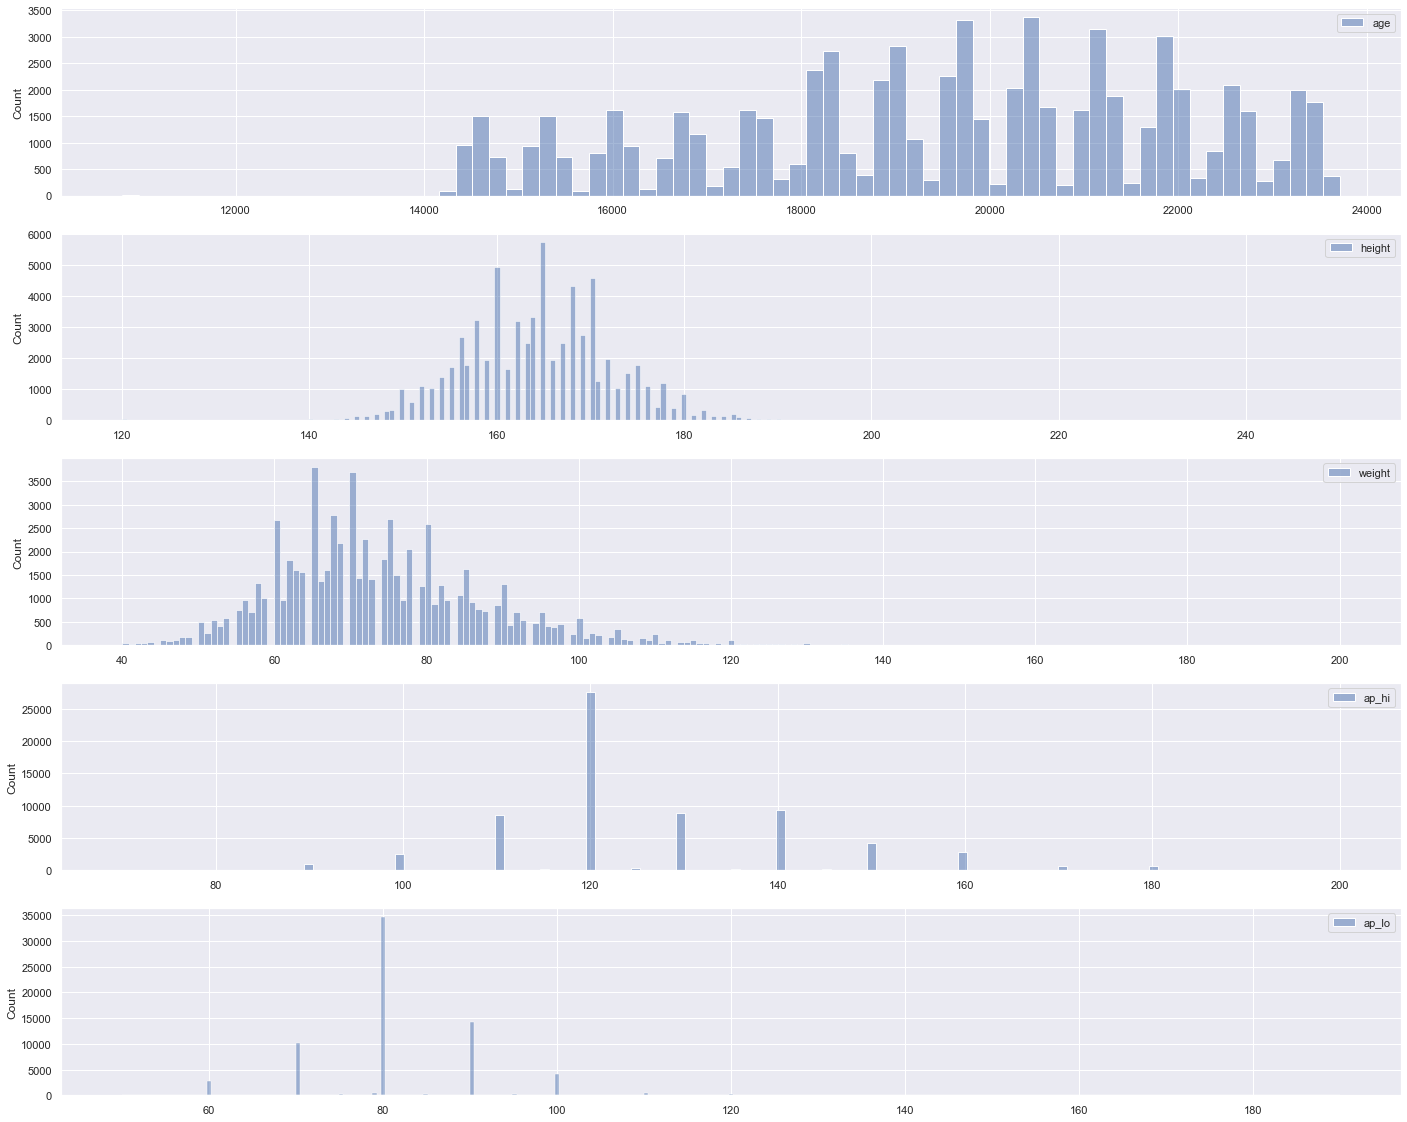

In [63]:
f, axes = plt.subplots(5, 1, figsize=(24, 20))

sb.histplot(data = cardio_data[["age"]], ax = axes[0])
sb.histplot(data = cardio_data[["height"]], ax = axes[1])
sb.histplot(data = cardio_data[["weight"]], ax = axes[2])
sb.histplot(data = cardio_data[["ap_hi"]], ax = axes[3])
sb.histplot(data = cardio_data[["ap_lo"]], ax = axes[4])


<AxesSubplot:xlabel='cardio', ylabel='count'>

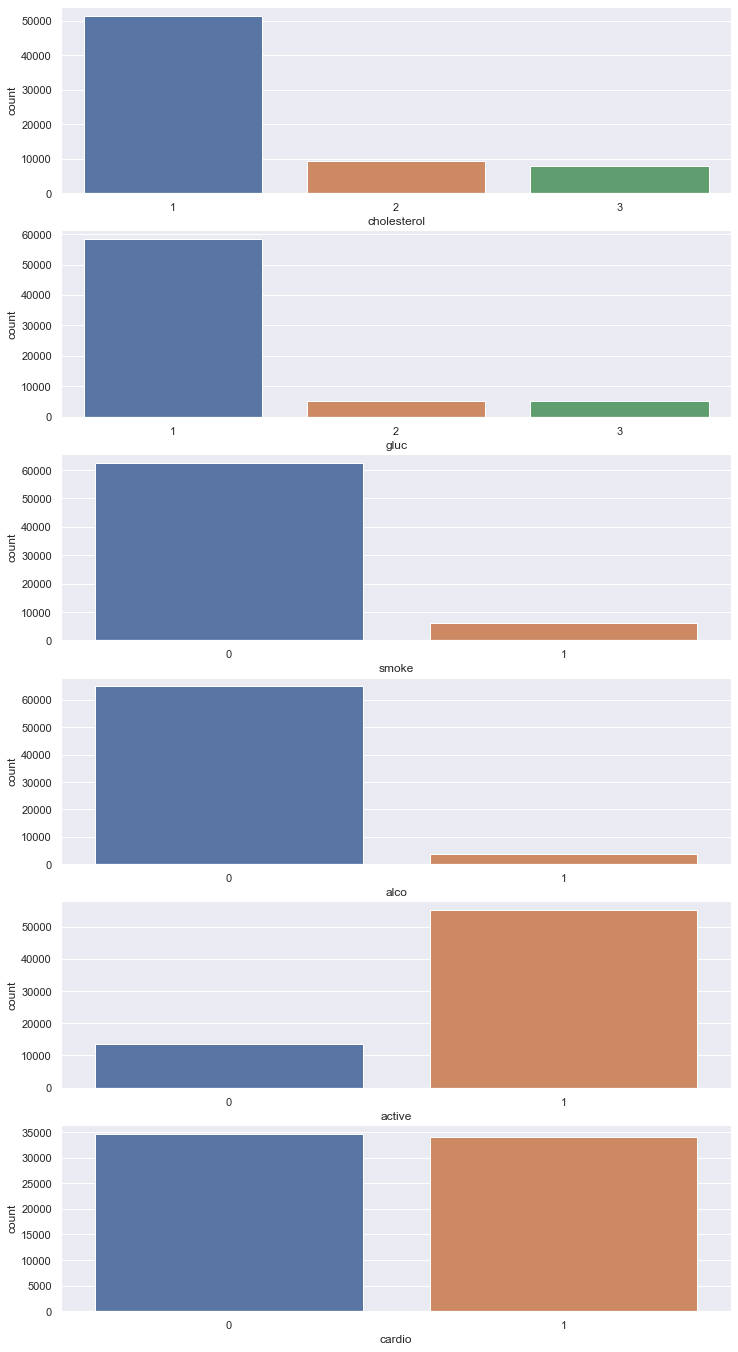

In [62]:
f, axes = plt.subplots(6, 1, figsize=(12, 24))

sb.countplot(data = cardio_data, ax = axes[0], x = "cholesterol")
sb.countplot(data = cardio_data, ax = axes[1], x = "gluc")
sb.countplot(data = cardio_data, ax = axes[2], x = "smoke")
sb.countplot(data = cardio_data, ax = axes[3], x = "alco")
sb.countplot(data = cardio_data, ax = axes[4], x = "active")
sb.countplot(data = cardio_data, ax = axes[5], x = "cardio")
# sb.countplot(data = cardio_data[["smoke"]], ax = axes[2])
# sb.countplot(data = cardio_data[["alco"]], ax = axes[3])
# sb.countplot(data = cardio_data[["active"]], ax = axes[4])
# sb.countplot(data = cardio_data[["cardio"]], ax = axes[5])